### FRBバランスシート、M2、流通貨幣データを取得して描画
####  https://note.com/scilabcafe/n/n4374022848ee

In [2]:
import pandas_datareader.data as web
import datetime

# 2018/1/1から現在まで
start = '2018-01-01'
end = datetime.date.today()

# FRB バランスシート
df_bs = web.DataReader(["WALCL"], "fred", start, end)
df_bs = df_bs.dropna() # 空データ削除

# M2
df_m2 = web.DataReader(["WM2NS"], "fred", start, end)
df_m2 = df_m2.dropna() # 空データ削除

# 流通貨幣
df_cu = web.DataReader(["CURRCIR"], "fred", start, end)
df_cu = df_cu.pct_change(12)*100 #12ヶ月前と比較

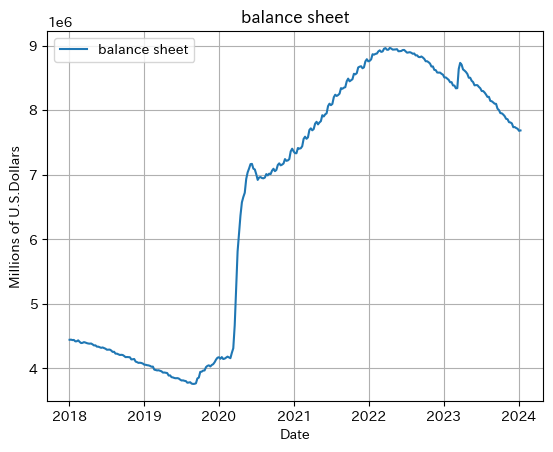

In [3]:
# グラフィック系ライブラリ
import matplotlib.pyplot as plt
from matplotlib import gridspec
import japanize_matplotlib
%matplotlib inline

# グラフの描画
plt.plot(df_bs['WALCL'], label='balance sheet')

plt.title('balance sheet')
plt.xlabel('Date')
plt.ylabel('Millions of U.S.Dollars')
plt.legend()
plt.grid(True)
plt.show()

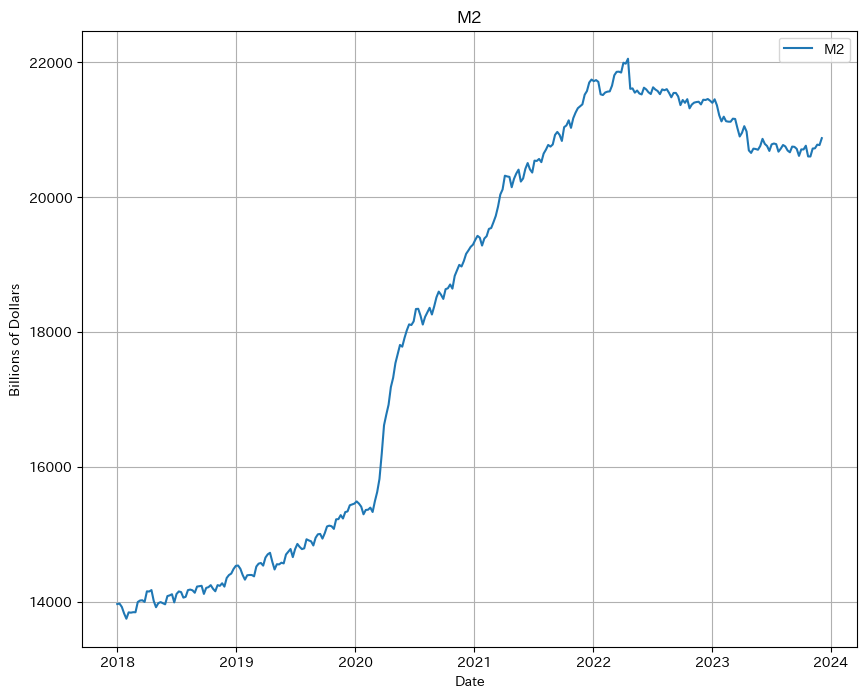

In [4]:
plt.figure(figsize=(10,8))

# グラフの描画
plt.plot(df_m2['WM2NS'], label='M2')

plt.title('M2')
plt.xlabel('Date')
plt.ylabel('Billions of Dollars')
plt.legend()
plt.grid(True)
plt.show()

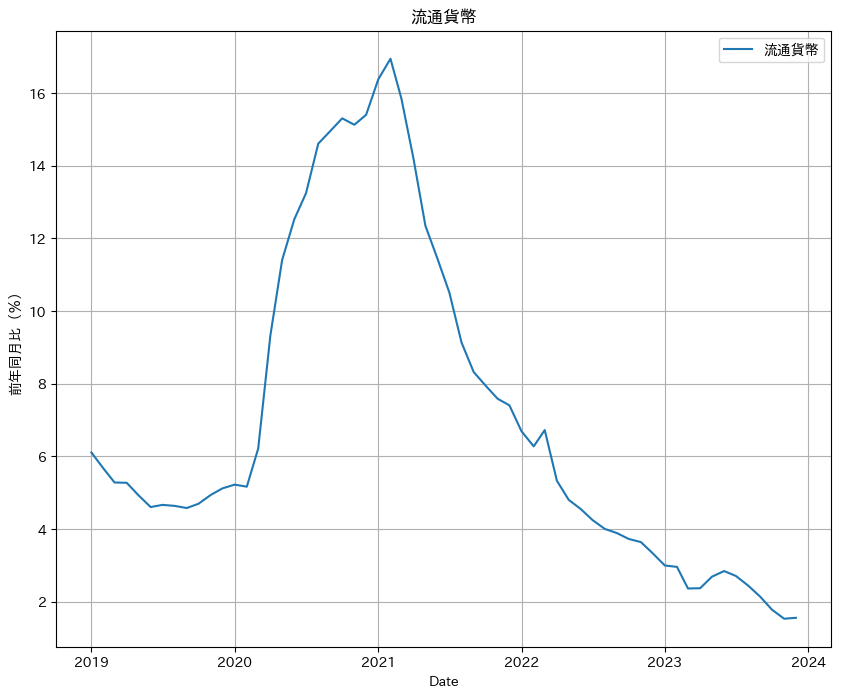

In [5]:
plt.figure(figsize=(10,8))

# グラフの描画
plt.plot(df_cu['CURRCIR'], label='流通貨幣')

plt.title('流通貨幣')
plt.xlabel('Date')
plt.ylabel('前年同月比（％）')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import plotly.graph_objects as go  # グラフ表示関連ライブラリ
import plotly.io as pio  # 入出力関連ライブラリ
pio.renderers.default = 'iframe'

# subplot
from plotly.subplots import make_subplots


# グラフの実体となる trace オブジェクトを生成
bs_trace = go.Scatter(
    x=df_bs.index,
    y=df_bs['WALCL'],
    mode='lines',
    line={'color':'red', 'width':4},
    name='FRBバランスシート（総資産）'
    )

m2_trace = go.Scatter(
    x=df_m2.index,
    y=df_m2['WM2NS'],
    mode='lines',
    line={'color':'red', 'width':4},
    name='M2'
    )

cu_trace = go.Scatter(
    x=df_cu.index,
    y=df_cu['CURRCIR'],
    mode='lines',
    line={'color':'red', 'width':4},
    name='流通貨幣'
    )



subplots_fig = make_subplots(
    rows=3,
    cols=1,
    start_cell='top-left',
    subplot_titles=[
        'FRBバランスシート（総資産）',
        'M2',
        '流通貨幣',
    ],
    horizontal_spacing=0.15,
    vertical_spacing=0.10,

)


# 描画領域である figure オブジェクトの作成                  
subplots_fig.add_trace(bs_trace, row=1, col=1)
subplots_fig.add_trace(m2_trace, row=2, col=1)
subplots_fig.add_trace(cu_trace, row=3, col=1)


# レイアウトの更新
subplots_fig.update_layout(
    
    # 凡例は非表示
    showlegend=False,
    
    # 幅と高さの設定
    width=900,height=900,
    
    title='',
    plot_bgcolor='white', # 背景色を白に設定
    
),


# 軸の設定
subplots_fig.update_yaxes(title='Millions of U.S.Dollars', row=1, col=1)
subplots_fig.update_yaxes(title='Billions of U.S.Dollars', row=2, col=1)
subplots_fig.update_yaxes(title='前年同月比（％）', row=3, col=1)

# linecolorを設定して、ラインをミラーリング（mirror=True）して枠にする
subplots_fig.update_xaxes(linecolor='black', linewidth=1, mirror=True, row=1, col=1)
subplots_fig.update_yaxes(linecolor='black', linewidth=1, mirror=True, row=1, col=1)

subplots_fig.update_xaxes(linecolor='black', linewidth=1, mirror=True, row=2, col=1)
subplots_fig.update_yaxes(linecolor='black', linewidth=1, mirror=True, row=2, col=1)

subplots_fig.update_xaxes(linecolor='black', linewidth=1, mirror=True, row=3, col=1)
subplots_fig.update_yaxes(linecolor='black', linewidth=1, mirror=True, row=3, col=1)

# ticks='inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
subplots_fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5, row=1, col=1)
subplots_fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5, row=1, col=1)

subplots_fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5, row=2, col=1)
subplots_fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5, row=2, col=1)

subplots_fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5, row=3, col=1)
subplots_fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5, row=3, col=1)

# gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash='dot'：破線
subplots_fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot', row=1, col=1)
subplots_fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot', row=1, col=1)

subplots_fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot', row=2, col=1)
subplots_fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot', row=2, col=1)

subplots_fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot', row=3, col=1)
subplots_fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot', row=3, col=1)

# tick0：初期軸目盛り, dtick：軸目盛り間隔
subplots_fig.update_xaxes(dtick='M12')  # 12カ月ごと

# 軸の文字サイズ変更
subplots_fig.update_xaxes(tickfont=dict(size=14, color='grey'))
subplots_fig.update_yaxes(tickfont=dict(size=16, color='grey'))

# show()メソッドでグラフを描画
subplots_fig.show()